# This notebook is for capstone project about risk prediction of heart failure of people

In [22]:
# Importing the libraries first

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Importing the dataset

df=pd.read_csv('datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
# Cleaning the data if needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


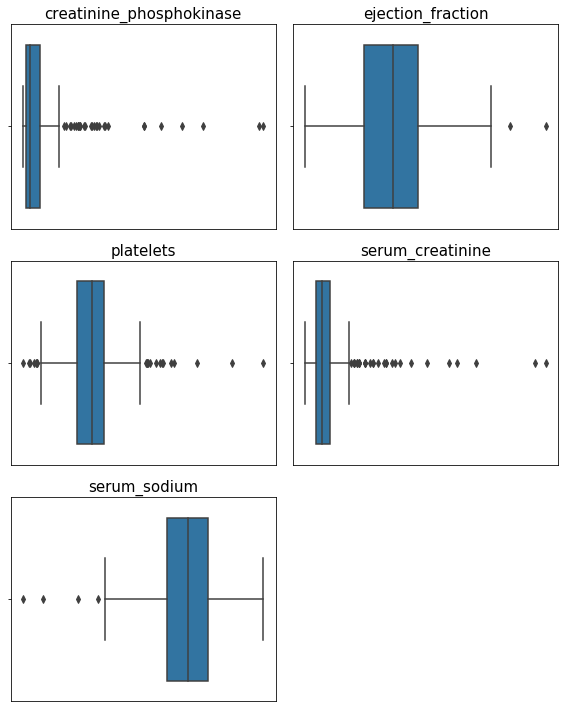

In [25]:
# Check outlier of creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, and serum_sodium.
fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 10))

ax = [ax1, ax2 ,ax3, ax4 ,ax5]

feature = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i, axes in zip(feature, ax):
    sns.boxplot(df[i], ax = axes)
    
    axes.set_title(i, fontsize = 15)
    axes.set_xticks([])
    axes.set_xlabel('')
    
ax6.set_visible(False)
plt.tight_layout()
plt.show()

IQR Score : 

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
time                          130.0
DEATH_EVENT                     1.0
dtype: float64


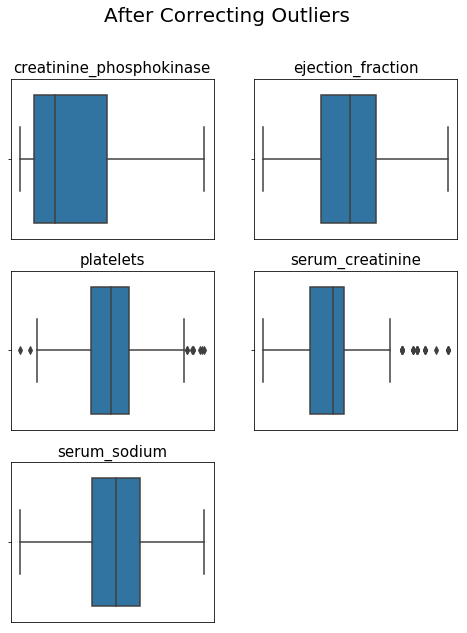

<Figure size 432x288 with 0 Axes>

In [26]:
# Correcting Outilers using IQR Score

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('IQR Score : \n\n{}'.format(IQR))

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))]

#Filling the outliers value with mean value of corresponding features
df = df.fillna(df.mean())

fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 10))
fig.suptitle('After Correcting Outliers', fontsize = 20)

ax = [ax1, ax2 ,ax3, ax4 ,ax5]

feature = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i, axes in zip(feature, ax):
    sns.boxplot(df[i], ax = axes)
    
    axes.set_title(i, fontsize = 15)
    axes.set_xticks([])
    axes.set_xlabel('')
    

ax6.set_visible(False)

plt.show()
plt.tight_layout()
fig.subplots_adjust(top=0.888)

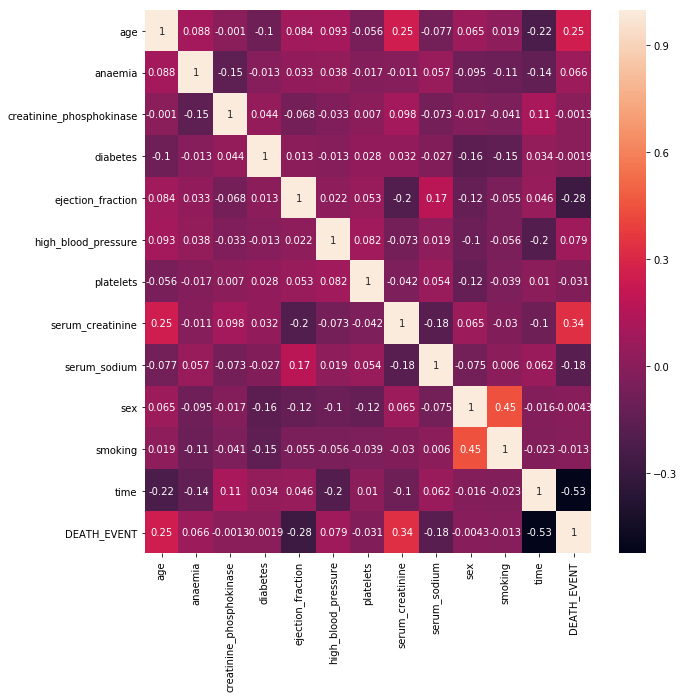

In [27]:
# Check correlation between factors
plt.figure(figsize = (10, 10)) 
sns.heatmap(df.corr(), annot=True)

In [28]:
# Data preprocessing by definiting X and y
X_df = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
X_df = X_df.astype('int')
X = np.asarray(X_df)
X[0:5]


array([[    75,      0,    582,      0,     20,      1, 265000,      1,
           130,      1,      0,      4],
       [    55,      0,    332,      0,     38,      0, 263358,      1,
           136,      1,      0,      6],
       [    65,      0,    146,      0,     20,      0, 162000,      1,
           129,      1,      1,      7],
       [    50,      1,    111,      0,     20,      0, 210000,      1,
           137,      1,      0,      7],
       [    65,      1,    160,      1,     20,      0, 327000,      1,
           136,      0,      0,      8]])

In [29]:
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype('int')
y = np.asarray(df['DEATH_EVENT'])
y[0:5]

array([1, 1, 1, 1, 1])

In [30]:
# Normalize the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

# Split training set and data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (209, 12) (209,)
Test set: (90, 12) (90,)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
# Modeling (Logistic Regression with Scikit-learn)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
# Predict the result using test set
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0])

In [33]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.52, 0.48],
       [0.48, 0.52],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.45, 0.55],
       [0.72, 0.28],
       [0.57, 0.43],
       [0.34, 0.66],
       [0.74, 0.26],
       [0.34, 0.66],
       [0.68, 0.32],
       [0.29, 0.71],
       [0.43, 0.57],
       [0.51, 0.49],
       [0.79, 0.21],
       [0.73, 0.27],
       [0.73, 0.27],
       [0.47, 0.53],
       [0.43, 0.57],
       [0.46, 0.54],
       [0.63, 0.37],
       [0.43, 0.57],
       [0.75, 0.25],
       [0.67, 0.33],
       [0.41, 0.59],
       [0.64, 0.36],
       [0.63, 0.37],
       [0.59, 0.41],
       [0.68, 0.32],
       [0.63, 0.37],
       [0.7 , 0.3 ],
       [0.64, 0.36],
       [0.69, 0.31],
       [0.43, 0.57],
       [0.54, 0.46],
       [0.44, 0.56],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.58, 0.42],
       [0.46, 0.54],
       [0.72, 0.28],
       [0.71, 0.29],
       [0.62, 0.38],
       [0.66, 0.34],
       [0.54, 0.46],
       [0.52, 0.48],
       [0.65, 0.35],
       [0.6 ,

Confusion matrix, without normalization
[[19  5]
 [11 55]]


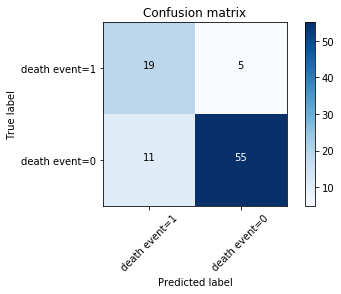

In [34]:
# Evaluation by confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['death event=1','death event=0'],normalize= False,  title='Confusion matrix')

In [35]:
# Calculate f1 score
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        66
           1       0.63      0.79      0.70        24

   micro avg       0.82      0.82      0.82        90
   macro avg       0.77      0.81      0.79        90
weighted avg       0.84      0.82      0.83        90



In [36]:
# Modelling (SVM)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
ypred = clf.predict(X_test)
ypred[0:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

Confusion matrix, without normalization
[[15  9]
 [ 6 60]]


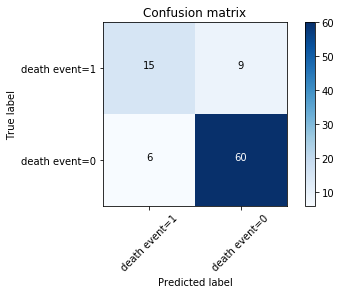

In [38]:
# Evaluation of SVM model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, ypred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['death event=1','death event=0'],normalize= False,  title='Confusion matrix')

In [39]:
# Calculate f1 score
print (classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.71      0.62      0.67        24

   micro avg       0.83      0.83      0.83        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



In [40]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
HFTree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
HFTree 


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
# Fit the training data into tree model
HFTree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
predTree = HFTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[1 0 0 0 1]


In [43]:
# Evaluation of decision tree model
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8111111111111111


In [44]:
# Calculate f1 score and jaccard index for logistic regression
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 



0.8278659611992946

In [45]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8222222222222222

In [46]:
# Calculate f1 score and jaccard index for SVM
from sklearn.metrics import f1_score
f1_score(y_test, ypred, average='weighted') 


0.8296296296296297

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, ypred)

0.8333333333333334